# FEATURE SELECTION

In [21]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
plt.rcParams['figure.figsize']=(16, 8.27) #set graphs size to A4 dimensions
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [22]:
train=pd.read_csv('scaled_train_set.csv')
test=pd.read_csv('scaled_test_set.csv')

In [23]:
X=train.drop('wage_class',axis=1)
y=train['wage_class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [25]:
model=xgb.XGBClassifier()

In [26]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

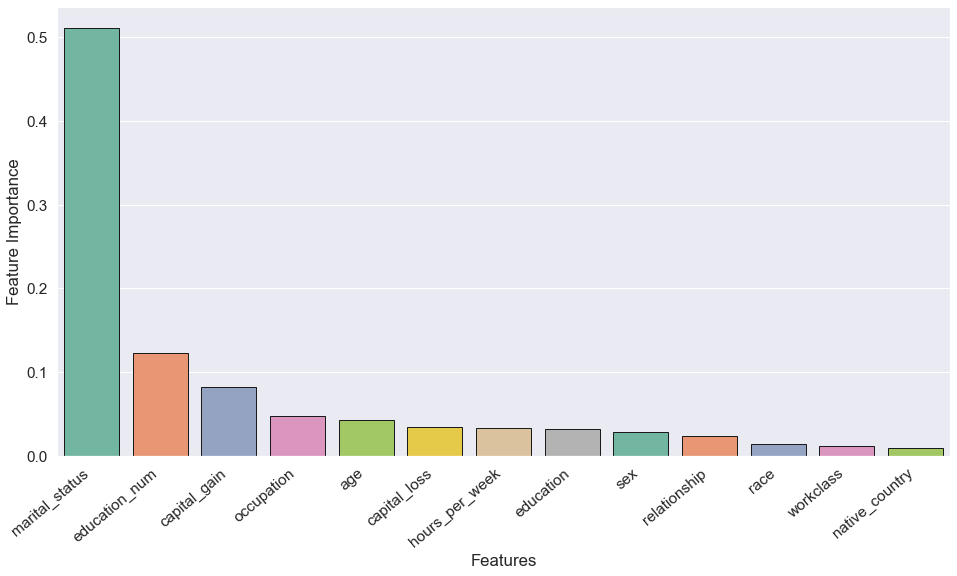

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.nlargest(X_train.shape[1])
ax=sns.barplot(a.index, a.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

As we can see, Race, Workclass and Native Country are not important features and we will drop them

In [28]:
train.drop(['native_country','race','workclass'],axis=1,inplace=True)
test.drop(['native_country','race','workclass'],axis=1,inplace=True)

#export train and test to csv
train.to_csv('final_train.csv',index=False)
test.to_csv('final_test.csv', index=False)

### Now we are ready for the next step which is Model Selection